In [1]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [3]:
#crete a new table with necessary colums
df2 = pd.DataFrame() # Create an empty DataFrame using the DataFrame constructor
df2['LSTAT'],df2['MEDV'] = df['LSTAT'], df['MEDV']
df2.tail()

,LSTAT,MEDV
484,9.67,470400.0
485,9.08,432600.0
486,5.64,501900.0
487,6.48,462000.0
488,7.88,249900.0


In [4]:
from sklearn.model_selection import train_test_split #to split the dataset into training and testing sets.
from sklearn.preprocessing import PolynomialFeatures # to generate polynomial features from the input data.
from sklearn import linear_model # This module contains various linear models, including the LinearRegression model.

X_train,X_test,y_train,y_test = train_test_split(df2['MEDV'],df2['LSTAT']) #MEDV independent var and LSTAT is dependent var
X_train_df,X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)         #converts the training and testing sets to pandas DataFrames

poly = PolynomialFeatures(degree = 3)
X_train_poly,X_test_poly = poly.fit_transform(X_train_df),poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly,y_train)
coefficient = model.coef_
intercept = model.intercept_

In [5]:
X_train

88     495600.0
472    147000.0
393    315000.0
201    512400.0
255    766500.0
         ...   
218    789600.0
94     432600.0
59     411600.0
485    432600.0
465    525000.0
Name: MEDV, Length: 366, dtype: float64

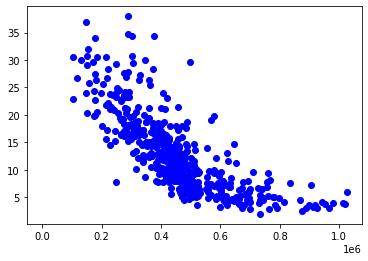

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x_axis = np.arange(0.0,1.0,0.1)
response = intercept + coefficient[1]*x_axis + coefficient[2]*x_axis**2


plt.scatter(df2['MEDV'],df2['LSTAT'],color = 'b')
plt.plot(x_axis,response,color='r')
plt.show()

In [7]:
from sklearn.metrics import r2_score
prediction = model.predict(X_test_poly)
r2_score(prediction,y_test)

0.37615934545998475